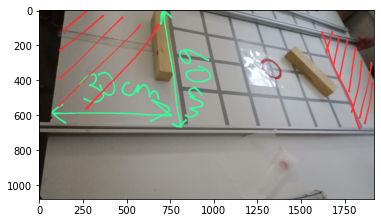

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
img = cv2.imread('area.jpeg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BGR default color order to RGB

mask = np.zeros_like(img)  # Create a mask of the same size as the image

# Floodfill parameters
tolerance = 20  # Tolerance for color differences. Increase for more lenient floodfill
newVal = (255,255,255)  # New color for floodfill area
loDiff = (tolerance,)*3  # Maximal lower brightness/color difference
upDiff = (tolerance,)*3  # Maximal upper brightness/color difference

def fill(event):
    global img
    y = event.ydata
    x = event.xdata

    # Check if x and y are inside the image
    if x is not None and y is not None:
        x, y = int(x), int(y)

        seed = (x, y)
        _ = cv2.floodFill(img, mask, seed, newVal, loDiff, upDiff)

        # Update the image
        implot.set_data(img)
        plt.draw()

# Create a figure and a plot
fig, ax = plt.subplots()
implot = ax.imshow(img, origin='upper')

# Connect the fill function to figure
fig.canvas.mpl_connect('button_press_event', fill)

# Show the plot
plt.show()
